Milestone - 1 (Data Preparation & Initial Analysis)

In [1]:
from google.colab import files

uploaded = files.upload()

Saving GlobalWeatherRepository.csv to GlobalWeatherRepository.csv


In [2]:
#To import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

#To load dataset
df = pd.read_csv("GlobalWeatherRepository.csv")

In [3]:
#Inspection of dataset
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("Data Types:\n", df.dtypes)
print("\n First few rows:\n", df.head())

Shape: (88468, 41)
Columns: ['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']
Data Types:
 country                          object
location_name                    object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
l

In [4]:
#To convert 'last_updated' to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')
print(df['last_updated'])

0       2024-05-16 13:15:00
1       2024-05-16 10:45:00
2       2024-05-16 09:45:00
3       2024-05-16 10:45:00
4       2024-05-16 09:45:00
                ...        
88463   2025-08-14 04:15:00
88464   2025-08-14 15:30:00
88465   2025-08-14 11:30:00
88466   2025-08-14 10:30:00
88467   2025-08-14 10:30:00
Name: last_updated, Length: 88468, dtype: datetime64[ns]



 Missing Values:
 country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone            

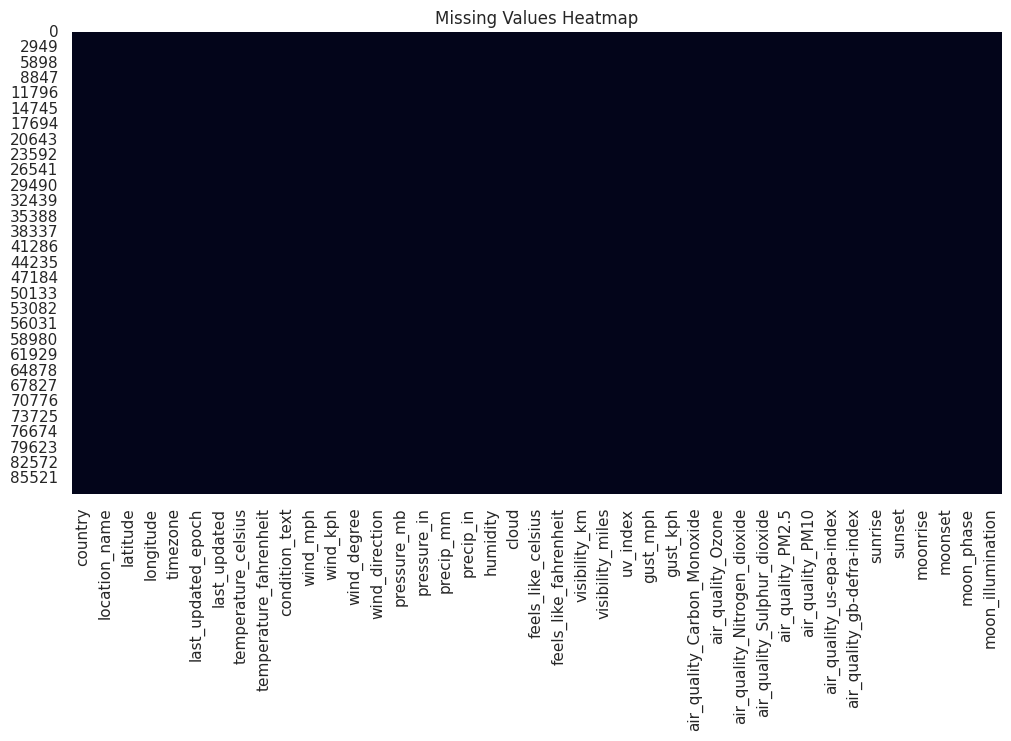

In [5]:
#To check the missing values
print("\n Missing Values:\n", df.isnull().sum())

#Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [6]:
#To drop columns with unit duplicates
df_clean = df.drop(columns=['temperature_fahrenheit', 'precip_in', 'visibility_miles'])
print(df_clean.columns.tolist())

['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


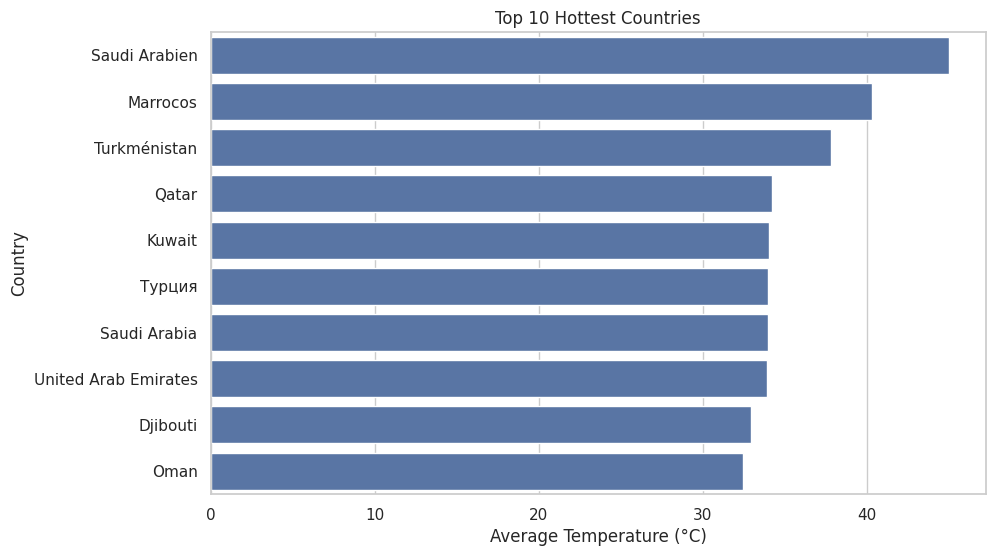

In [7]:
#To check for anomalies
#Top 10 countries by high temperature
top_temp = df_clean.groupby('country')['temperature_celsius'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_temp.values, y=top_temp.index)
plt.title("Top 10 Hottest Countries")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Country")
plt.show()


In [8]:
#Data Coverage – Records per country
print("\nRecords per country:\n", df_clean['country'].value_counts().head(10))

#Data Coverage – Records per month
print("\nRecords per month:\n", df_clean['last_updated'].dt.to_period('M').value_counts().sort_index())


Records per country:
 country
Bulgaria      942
Indonesia     911
Iran          908
Sudan         908
Belgium       907
Madagascar    907
Thailand      907
Turkey        907
Bolivia       901
Vietnam       860
Name: count, dtype: int64

Records per month:
 last_updated
2024-05    3298
2024-06    5807
2024-07    5581
2024-08    6045
2024-09    5856
2024-10    6020
2024-11    5817
2024-12    6045
2025-01    6006
2025-02    5457
2025-03    6041
2025-04    5850
2025-05    6027
2025-06    5846
2025-07    6042
2025-08    2730
Freq: M, Name: count, dtype: int64


In [9]:
#To aggregate daily to monthly averages per country
df_monthly = df_clean.groupby([
    df_clean['last_updated'].dt.to_period('M'),
    'country'
]).mean(numeric_only=True).reset_index()
print(df_monthly)

     last_updated      country  latitude  longitude  last_updated_epoch  \
0         2024-05  Afghanistan   34.5200    69.1800        1.716478e+09   
1         2024-05      Albania   41.3300    19.8200        1.716478e+09   
2         2024-05      Algeria   36.7600     3.0500        1.716478e+09   
3         2024-05      Andorra   42.5000     1.5200        1.716478e+09   
4         2024-05       Angola   -8.8400    13.2300        1.716478e+09   
...           ...          ...       ...        ...                 ...   
2980      2025-08    Venezuela   10.5000   -66.9167        1.754598e+09   
2981      2025-08      Vietnam   21.0833   105.2750        1.754598e+09   
2982      2025-08        Yemen   15.3547    44.2067        1.754598e+09   
2983      2025-08       Zambia  -15.4167    28.2833        1.754598e+09   
2984      2025-08     Zimbabwe  -17.8178    31.0447        1.754598e+09   

      temperature_celsius   wind_mph   wind_kph  wind_degree  pressure_mb  \
0               20.305

In [10]:
#To convert Period to Timestamp for Power BI compatibility
df_monthly['last_updated'] = df_monthly['last_updated'].astype(str)
print(df_monthly['last_updated'])

0       2024-05
1       2024-05
2       2024-05
3       2024-05
4       2024-05
         ...   
2980    2025-08
2981    2025-08
2982    2025-08
2983    2025-08
2984    2025-08
Name: last_updated, Length: 2985, dtype: object


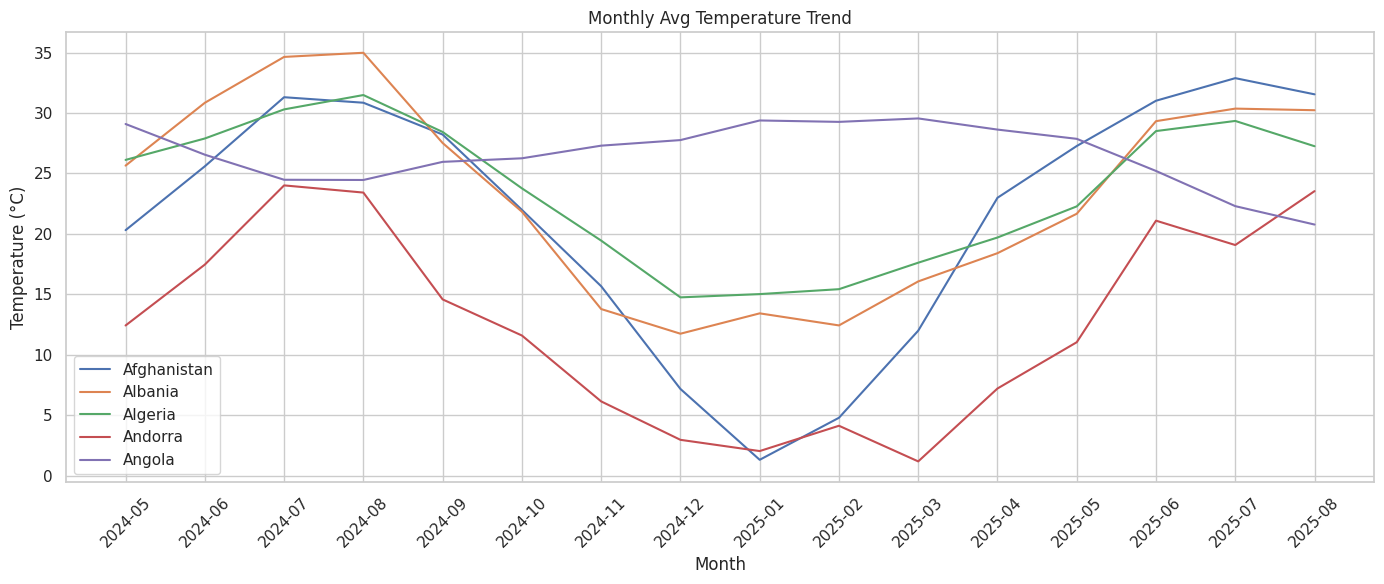

In [11]:
#Monthly Temperature Trend Visualization
plt.figure(figsize=(14, 6))
sample_countries = df_monthly['country'].unique()[:5]
for country in sample_countries:
    subset = df_monthly[df_monthly['country'] == country]
    plt.plot(subset['last_updated'], subset['temperature_celsius'], label=country)

plt.legend()
plt.title("Monthly Avg Temperature Trend")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df_clean.to_csv("clean_weather_data.csv", index=False)
df_monthly.to_csv("monthly_weather_data.csv", index=False)
print("\nCleaned data saved as 'clean_weather_data.csv'")
print("Monthly aggregated data saved as 'monthly_weather_data.csv'")


Cleaned data saved as 'clean_weather_data.csv'
Monthly aggregated data saved as 'monthly_weather_data.csv'


In [13]:
from google.colab import files
files.download("clean_weather_data.csv")
files.download("monthly_weather_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

End of Milestone-1

Beginning of Milestone - 2 (Core Analysis & Visualization Design)

In [14]:
#To import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [15]:
#To load aggregated dataset
'''Monthly weather dataset can be used instead of clean weather data set. Because,
monthly_weather_data can be used to get Trends, patterns, dashboard visualizations
clean_weather_data.csv can be used for Extreme weather event analysis'''

df = pd.read_csv("monthly_weather_data.csv")
df['last_updated'] = pd.to_datetime(df['last_updated'])
print(df['last_updated'])

0      2024-05-01
1      2024-05-01
2      2024-05-01
3      2024-05-01
4      2024-05-01
          ...    
2980   2025-08-01
2981   2025-08-01
2982   2025-08-01
2983   2025-08-01
2984   2025-08-01
Name: last_updated, Length: 2985, dtype: datetime64[ns]


In [16]:
#To get Statistical summary
print(df.describe())

                        last_updated     latitude    longitude  \
count                           2985  2985.000000  2985.000000   
mean   2024-12-14 09:48:32.562814208    19.259124    20.893836   
min              2024-05-01 00:00:00   -41.300000  -175.200000   
25%              2024-08-01 00:00:00     4.366700    -8.000000   
50%              2024-12-01 00:00:00    17.120000    20.465100   
75%              2025-04-01 00:00:00    40.400000    48.960200   
max              2025-08-01 00:00:00    63.830000   179.220000   
std                              NaN    24.434734    66.392399   

       last_updated_epoch  temperature_celsius     wind_mph     wind_kph  \
count        2.985000e+03          2985.000000  2985.000000  2985.000000   
mean         1.735472e+09            22.826023     8.332073    13.412377   
min          1.716435e+09           -19.554839     2.210345     3.613793   
25%          1.723811e+09            18.310714     5.470000     8.796667   
50%          1.734346e+09

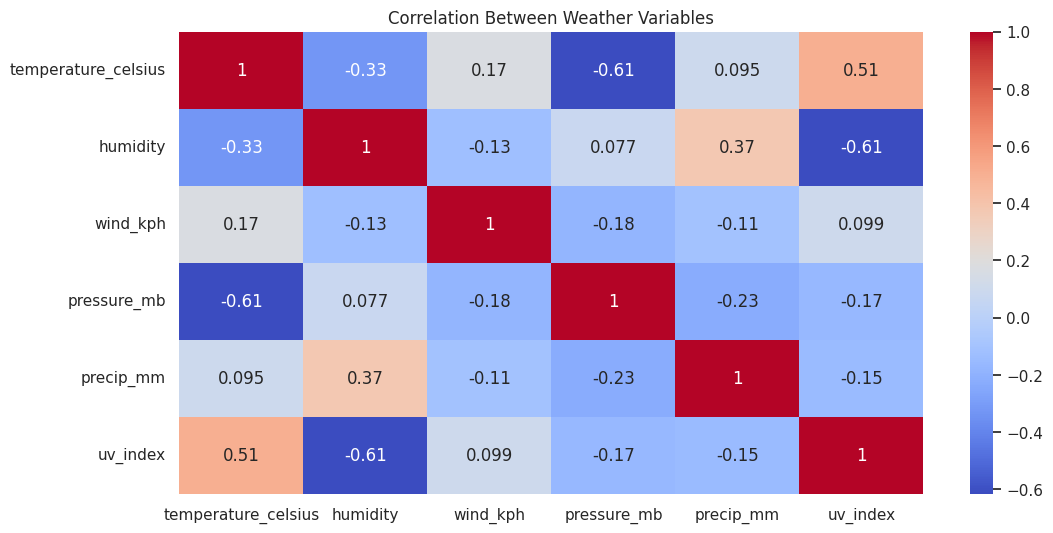

In [17]:
#HeatMap for Correlation
numeric_cols = ['temperature_celsius', 'humidity', 'wind_kph', 'pressure_mb', 'precip_mm', 'uv_index']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Weather Variables")
plt.show()

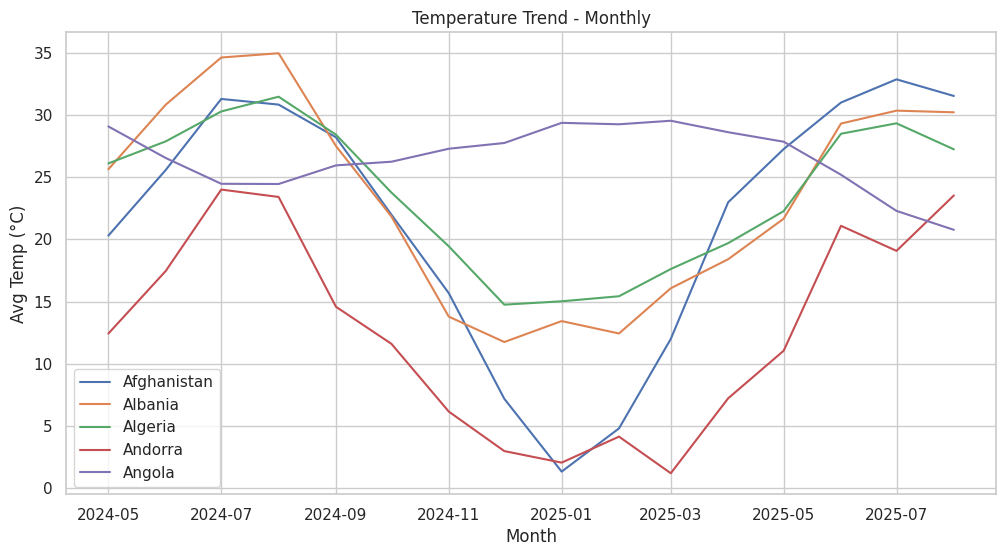

In [18]:
#Line Chat for Seasonal Temperature Trends
for country in df['country'].unique()[:5]:
    subset = df[df['country'] == country]
    plt.plot(subset['last_updated'], subset['temperature_celsius'], label=country)
plt.legend()
plt.title("Temperature Trend - Monthly")
plt.xlabel("Month")
plt.ylabel("Avg Temp (°C)")
plt.show()

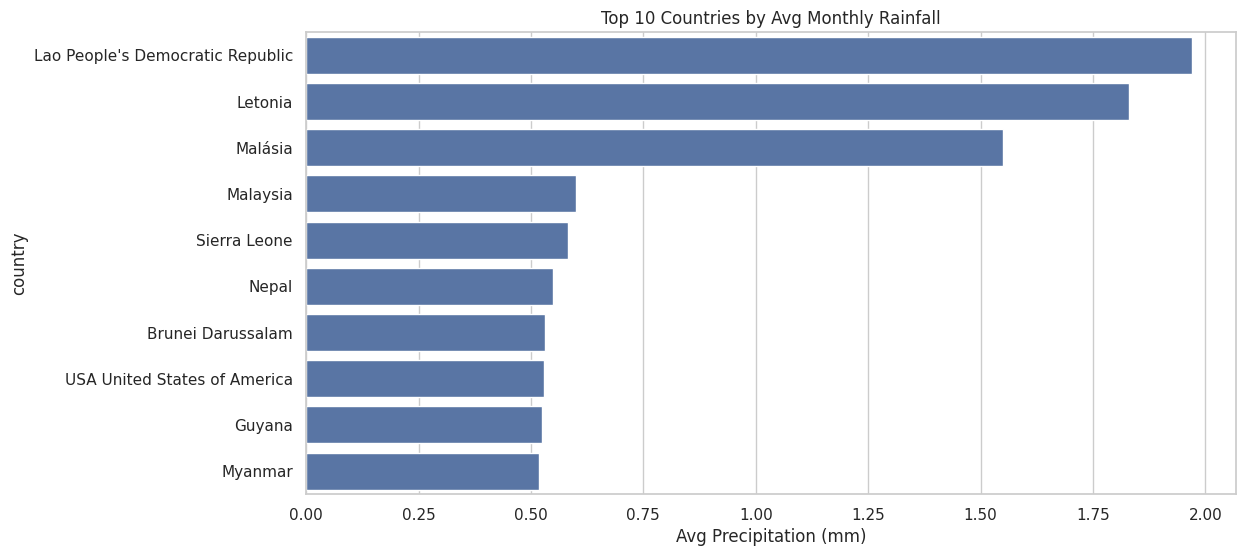

In [19]:
#Comparing top 10 regions with rainfall
top_rain = df.groupby("country")["precip_mm"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_rain.values, y=top_rain.index)
plt.title("Top 10 Countries by Avg Monthly Rainfall")
plt.xlabel("Avg Precipitation (mm)")
plt.show()


In [20]:
#Extreme weather reports by top 5 hottest months
hottest = df.sort_values(by='temperature_celsius', ascending=False).head(5)
print("Top 5 Hottest Months:\n", hottest[['country', 'last_updated', 'temperature_celsius']])

Top 5 Hottest Months:
             country last_updated  temperature_celsius
529   Saudi Arabien   2024-07-01            45.000000
455            Iraq   2024-07-01            44.800000
656            Iraq   2024-08-01            44.751613
2701         Kuwait   2025-07-01            44.680645
262            Iraq   2024-06-01            44.620000


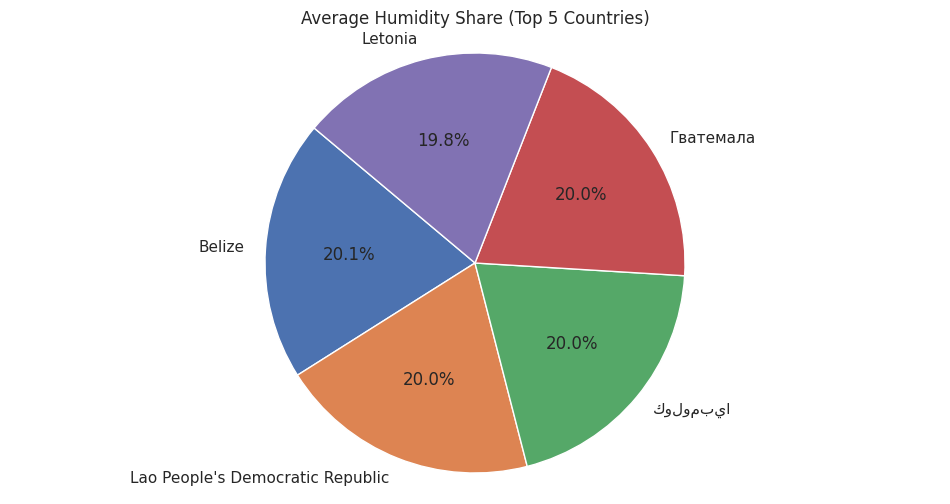

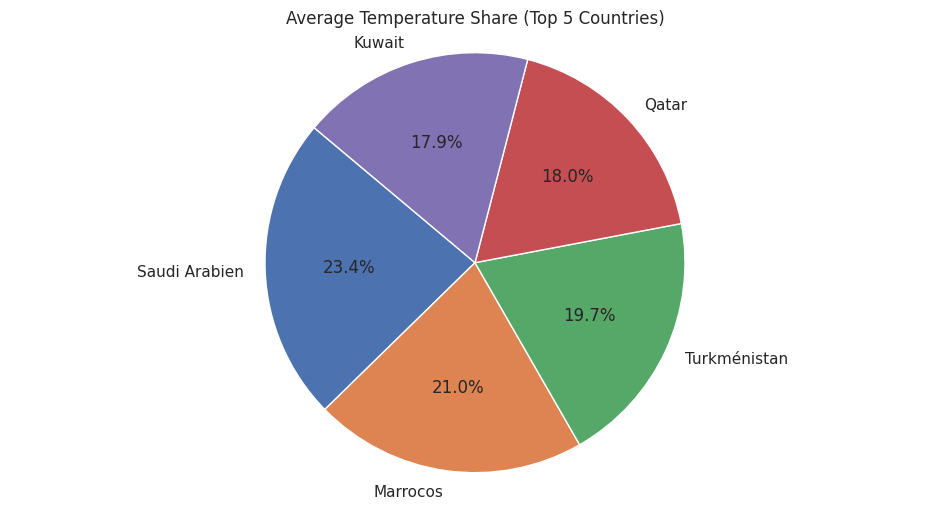

In [21]:
#Temperature vs Humidity by pie charts
#Average humidity by top 5 countries
avg_humidity = df.groupby("country")["humidity"].mean().sort_values(ascending=False).head(5)
plt.pie(avg_humidity.values, labels=avg_humidity.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Humidity Share (Top 5 Countries)")
plt.axis('equal')
plt.show()

#Average temperature by top 5 countries
avg_temp = df.groupby("country")["temperature_celsius"].mean().sort_values(ascending=False).head(5)
plt.pie(avg_temp.values, labels=avg_temp.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Temperature Share (Top 5 Countries)")
plt.axis('equal')
plt.show()


Milestone-2 is on process